In [87]:
# Création d'un schéma pour les données du fichier "Files/Ventes/Ventes - Janvier 2024.csv" dans DataFrame Spark nommé df
from pyspark.sql.types import *

ventesSchema = StructType(
    [
        StructField("VenteID", StringType()),
        StructField("Date", DateType()),
        StructField("Produit", StringType()),
        StructField("Quantite", IntegerType()),
        StructField("Ventes", FloatType()),
        StructField("ClientPrenom", StringType()),
        StructField("ClientNom", StringType()),
        StructField("ClientEmail", StringType()),
        StructField("Pays", StringType()),
    ]
)


# Chargement des données du fichier "Files/Ventes/Ventes - Janvier 2024.csv" dans DataFrame Spark nommé df
df = (
    spark.read.format("csv")
    .schema(ventesSchema)
    .load("Files/ventes/Ventes - Janvier 2024.csv")
)

display(df.head(10))


StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 89, Finished, Available)

SynapseWidget(Synapse.DataFrame, e4a83dd1-0039-4454-a966-578df3395f75)

In [88]:
# Group By des ventes par pays avec PySpark
df_transformed_pyspark = df.groupBy("Pays").agg(sum("Ventes").alias("Total_Ventes")).sort("Total_Ventes", ascending=[False])

# Affichage du top 10 des pays avec le plus de ventes
display(df_transformed_pyspark.head(10))

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 90, Finished, Available)

SynapseWidget(Synapse.DataFrame, 7d5e278c-e24d-4417-beed-fe332e80624a)

In [89]:
# Group By des ventes par pays à l'aide de fonctions SQL
from pyspark.sql.functions import sum, avg, count, round

df_transformed_pyspark_sql = df.groupBy("Pays").agg(
    sum("Ventes").alias("Total_Ventes"),
    round(avg("Ventes"),0).alias("AVG_Ventes"),
    count("Ventes").alias("Nb_Ventes"),
)

display(df_transformed_pyspark_sql.head(10))

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 91, Finished, Available)

SynapseWidget(Synapse.DataFrame, 50421fc8-7723-47b9-bbff-450fee374a0d)

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 92, Finished, Available)

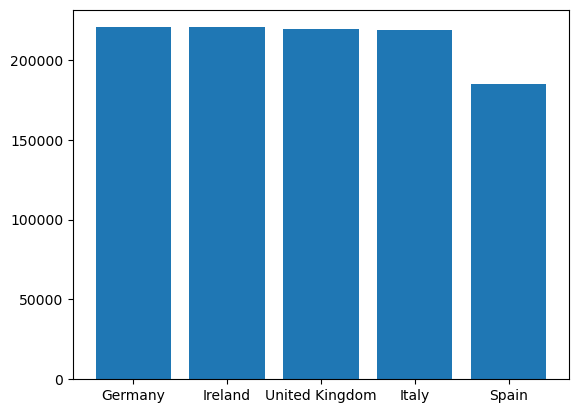

In [90]:
from matplotlib import pyplot as plt

# Création d'un Dataframe Pandas avec le top 5 des pays par Total_Ventes
df_transformed_plt = df_transformed_pyspark.toPandas().head(5)

# Tri des valeurs par Total_Ventes
df_transformed_plt = df_transformed_plt.sort_values(by="Total_Ventes", ascending=False)

# Création d'un histogramme qui affiche le Total_Ventes par Pays
plt.bar(x=df_transformed_plt["Pays"], height=df_transformed_plt["Total_Ventes"])

# Afficher l'histogramme the plot
plt.show()

In [91]:
# Enregistrement du Dataframe df_transformed_pyspark_sql dans un fichier Parquet
df_transformed_pyspark.write.mode("overwrite").parquet("Files/ventes_agg/")
print("Les données sont sauvegardées dans un nouveau fichier Parquet")

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 93, Finished, Available)

Les données sont sauvegardées dans un nouveau fichier Parquet


In [92]:
# Lecture du fichier Parquet créé à l'étape précédente
df_ventes_parquet = (
    spark.read.format("parquet").option("header", "true").load("Files/ventes_agg/")
)
display(df_ventes_parquet.head(10))

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 94, Finished, Available)

SynapseWidget(Synapse.DataFrame, 6d7ea5f6-ed0b-455f-9628-d083d208c39e)

In [93]:
# Création d'une nouvelle table qui sauvegarde les données du fichier initial
df.write.mode("overwrite").format("delta").saveAsTable("ventes")
print("Les données sont sauvegardées dans une nouvelle table Delta")

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 95, Finished, Available)

Les données sont sauvegardées dans une nouvelle table Delta


In [94]:
%%sql
--Lecture des données de la table ventes créée à l'aide de SQL
--La ligne %%sql au début est appelée magic et indique à Spark que le langage utilisé dans cette cellule est SQL. (on peut utiliser pyaspark, scala


SELECT * FROM ventes

StatementMeta(, d3ca5de8-37c9-461a-8921-e4b15e64c157, 96, Finished, Available)

<Spark SQL result set with 500 rows and 9 fields>